# 1. call back

In [3]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=1234)

In [5]:
x_train = x_train.reshape(-1,28,28,1)/255
x_val = x_val.reshape(-1,28,28,1)/255
x_test = x_test.reshape(-1,28,28,1)/255


 입력 : 28,28,1 이 들어가서 --> Conv2D(3,3) 크기의 32개, relu --> Conv2D(3,3) 크기의 32개, relu
        # --> MaxPooling2D(stride=2) --> GlobalAveragePooling2D -->10개 분류 

# tf.keras의 함수형으로 위의 모델을 만들어보기!!

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Input

In [12]:
input_layer = Input(shape=(28,28,1))
def make_model(input) :
    x = Conv2D(32, (3,3), activation='relu')(input)
    x = Conv2D(32, (3,3), activation='relu')(x)
    x = MaxPooling2D(strides=2)(x)
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(10, activation='softmax')(x)
    
    return x

model = Model(inputs=input_layer, outputs=make_model(input_layer))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
from tensorflow.keras.utils import plot_model

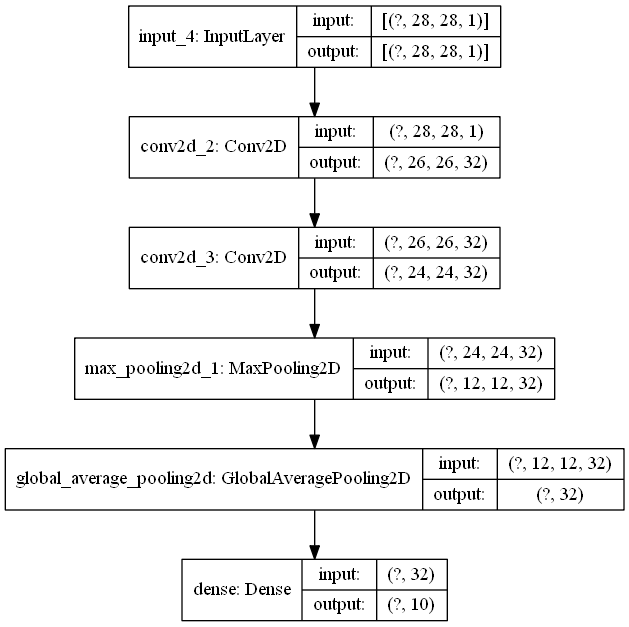

In [17]:
plot_model(model, show_shapes=True)

In [26]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_val, y_val), callbacks = callbacks)

Epoch 1/20
1313/1313 [==============================] - 21s 16ms/step - loss: 0.2152 - accuracy: 0.9342 - val_loss: 0.2097 - val_accuracy: 0.9371
Epoch 2/20
1313/1313 [==============================] - 21s 16ms/step - loss: 0.2147 - accuracy: 0.9334 - val_loss: 0.1921 - val_accuracy: 0.9435
Epoch 3/20
1313/1313 [==============================] - 21s 16ms/step - loss: 0.2125 - accuracy: 0.9349 - val_loss: 0.1953 - val_accuracy: 0.9416
Epoch 4/20
1313/1313 [==============================] - 21s 16ms/step - loss: 0.2115 - accuracy: 0.9353 - val_loss: 0.2109 - val_accuracy: 0.9360
Epoch 5/20
1313/1313 [==============================] - 21s 16ms/step - loss: 0.2087 - accuracy: 0.9358 - val_loss: 0.2021 - val_accuracy: 0.9416
Epoch 00005: early stopping


callback 중 ModelCheckPoint(중간에 모델을 저장하고 싶을 때,,,,, )
- filepath : 모델 저장할 경로..
- monitor : 모니터링을 할 평가지표
- verbose : 과정에 대한 상세함 0(과정보임)-2(과정 안보임)
- save_best_only : True 를 하면 제일 좋은 모델 1개만 저장 
- save_weights_only : 
- mode : auto/min/max 

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [22]:
save_path = 'models/best_model.hdf5'
callbacks = [ModelCheckpoint(
        filepath = save_path,
        monitor = 'accuracy',
        verbose = 1,
        save_best_only = True
)]

callback 중에서 중간에 멈추는 Early Stopping에 대한 부분 
- patience : 5 --> 5번의 에포그를 수행하면서 더 이상 성능향상이 없으면 학습을 안함

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
callbacks = [
        EarlyStopping(monitor = 'val_accuracy', patience=3, verbose=1)
]

ReduceLearningRate ---> 중간에 진행을 하다가 성능 향상이 없으면, 멈추는 것이 아니라 좀 더 자세하게 공부하도록 learning rate를 조정함 
- factor : 0.1 --> 0.01(새로운 learning rate = factor * 기존 learning rate, 1보다 작은 값으로 설정함)
- patience
- min_lr 

In [27]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [28]:
callbacks = [
        ReduceLROnPlateau(monitor = 'val_accuracy',
                        patience = 5,
                        factor = 0.2, 
                        verbose=2,
                        min_lr =1e-5)
        
]

In [29]:
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val), callbacks = callbacks)

Epoch 1/50
1313/1313 [==============================] - 22s 16ms/step - loss: 0.2070 - accuracy: 0.9362 - val_loss: 0.1915 - val_accuracy: 0.9431
Epoch 2/50
1313/1313 [==============================] - 21s 16ms/step - loss: 0.2062 - accuracy: 0.9364 - val_loss: 0.1936 - val_accuracy: 0.9410
Epoch 3/50
1313/1313 [==============================] - 21s 16ms/step - loss: 0.2038 - accuracy: 0.9378 - val_loss: 0.1916 - val_accuracy: 0.9421
Epoch 4/50
1313/1313 [==============================] - 20s 16ms/step - loss: 0.2010 - accuracy: 0.9387 - val_loss: 0.1937 - val_accuracy: 0.9425
Epoch 5/50
1313/1313 [==============================] - 21s 16ms/step - loss: 0.1991 - accuracy: 0.9384 - val_loss: 0.1913 - val_accuracy: 0.9435
Epoch 6/50
1313/1313 [==============================] - 21s 16ms/step - loss: 0.2003 - accuracy: 0.9375 - val_loss: 0.2217 - val_accuracy: 0.9297
Epoch 7/50
1313/1313 [==============================] - 21s 16ms/step - loss: 0.1950 - accuracy: 0.9403 - val_loss: 0.1906 -